In [65]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import evalml
import woodwork as ww
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from evalml.model_understanding.graphs import confusion_matrix
from evalml.model_understanding.graphs import graph_confusion_matrix
from featuretools.selection import remove_low_information_features, remove_highly_null_features, remove_single_value_features, remove_highly_correlated_features

In [66]:
df = pd.read_csv('ca.csv')
df.head()

,DATE,STATUS,QLANG,DEM_GENDER,DEM_AGE,DEM_ABOR,DEM_ABOR_TYPE,DEM_STDNT,DEM_VET,DEM_HEALTH,...,FENT_NMU_NTY,HYD_NMU_NTY,HYDM_NMU_NTY,METH_NMU_NTY,MORPH_NMU_NTY,OXY_NMU_NTY,OXYM_NMU_NTY,SUF_NMU_NTY,TAP_NMU_NTY,TRAM_NMU_NTY
0,2017-09-28 18:13:25,3,1,1,18,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017-10-18 18:46:34,3,1,1,18,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017-09-29 06:58:50,3,1,1,24,0,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-10-03 17:58:19,3,1,1,16,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017-10-25 21:09:49,3,1,1,21,0,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
temp = [i for i in df.columns if i.find('NMU') > -1]
temp

['FENT_NMU',
 'BUP_NMU',
 'METH_NMU',
 'MORPH_NMU',
 'OXY_NMU',
 'OXYM_NMU',
 'TRAM_NMU',
 'TAP_NMU',
 'COD_NMU',
 'COTC_NMU',
 'HYD_NMU',
 'HYDM_NMU',
 'SUF_NMU',
 'STIM_NMU',
 'BENZ_NMU',
 'THC_NMU',
 'DRSHOP_NMU',
 'OP_NMU_EVER',
 'GABA_NMU_EVER',
 'BENZ_NMU_EVER',
 'STIM_NMU_EVER',
 'OP_NMU_YR',
 'BENZ_NMU_YR',
 'STIM_NMU_YR',
 'GABA_NMU_YR',
 'OP_NMU_NTY',
 'OP_NMU_MNTH',
 'OP_NMU_WK',
 'BENZ_NMU_NTY',
 'BENZ_NMU_MNTH',
 'BENZ_NMU_WK',
 'STIM_NMU_NTY',
 'STIM_NMU_MNTH',
 'STIM_NMU_WK',
 'GABA_NMU_NTY',
 'GABA_NMU_MNTH',
 'GABA_NMU_WK',
 'BUP_NMU_NTY',
 'COD_NMU_NTY',
 'COTC_NMU_NTY',
 'FENT_NMU_NTY',
 'HYD_NMU_NTY',
 'HYDM_NMU_NTY',
 'METH_NMU_NTY',
 'MORPH_NMU_NTY',
 'OXY_NMU_NTY',
 'OXYM_NMU_NTY',
 'SUF_NMU_NTY',
 'TAP_NMU_NTY',
 'TRAM_NMU_NTY']

In [72]:
temp = [i for i in df.columns if i.find('NMU') > -1]

df['DRUG_EVER'] = 0

for i in range(len(df)):
    flag = False
    for j in temp:
        if df.at[i, j] > 0:
            flag = True
            break
    if flag:
        df.at[i, 'DRUG_EVER'] = 1

In [74]:
df['DRUG_EVER'].sum() / len(df)

0.3360647546717298

In [76]:
print("Original dataset has {} entries and {} features".format(*df.shape))

Original dataset has 10007 entries and 186 features


In [77]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
DATE,0.0
STATUS,0.0
QLANG,0.0
DEM_GENDER,0.0
DEM_AGE,0.0
...,...
OXYM_NMU_NTY,0.0
SUF_NMU_NTY,0.0
TAP_NMU_NTY,0.0
TRAM_NMU_NTY,0.0


In [78]:
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'constant')

for col in df.columns:
    df[col] = imputer.fit_transform(df[col].values.reshape(-1, 1))

In [79]:
name = 'DRUG_EVER'

len(df[df[name] == 0]) / len(df)

0.6639352453282702

In [80]:
for i in df.columns:
    print(i)

DATE
STATUS
QLANG
DEM_GENDER
DEM_AGE
DEM_ABOR
DEM_ABOR_TYPE
DEM_STDNT
DEM_VET
DEM_HEALTH
DEM_LOCATION
DEM_REGION
DEM_POSTAL
DEM_MARITAL
DEM_INCOME
DEM_EDU
DEM_PREG
DEM_PREGMNTH
HEALTH_SETTING_PRE
HEALTH_SETTING_HOS
HEALTH_SETTING_OUT
HEALTH_SETTING_HOME
HEALTH_SETTING_PRIV
HEALTH_SETTING_OTH
HEALTH_ROLE
HEALTH_RX
FENT_USE
FENT_NMU
BUP_USE
BUP_NMU
METH_USE
METH_NMU
MORPH_USE
MORPH_NMU
OXY_USE
OXY_NMU
OXYM_USE
OXYM_NMU
TRAM_USE
TRAM_NMU
TAP_USE
TAP_NMU
COD_USE
COD_NMU
COTC_NMU
HYD_USE
HYD_NMU
HYDM_USE
HYDM_NMU
SUF_USE
SUF_NMU
STIM_USE
STIM_NMU
BENZ_USE
BENZ_NMU
THC_USE
THC_NMU
OTH_RX_DRUG_USE
TOB_FREQ_USE
ALC_FREQ_USE
CAN_REC_USE
CAN_MED_USE
COKE_USE
CRACK_USE
MDMA_USE
GHB_USE
HAL_USE
INH_USE
SPEED_USE
NPFENT_USE
HEROIN_USE
KET_USE
MEPH_USE
SPICE_USE
SAL_USE
STER_USE
HELP_SUB_USE
HELP_SUB_USE_ALC
HELP_SUB_USE_PREDRGS
HELP_SUB_USE_OTH
OPIOID_DEP_METH
OPIOID_DEP_BUP
OPIOID_DEP_HER
OPIOID_DEP_OTH
OPIOID_DEP_NO
PAIN_CHRONIC
PAIN_CHRONIC_DOC
PAIN_CHRONIC_RX
PAIN_ACUTE
PAIN_ACUTE_DOC
PAIN_ACUT

In [81]:
y = df[name]

df = df[df.columns[1:25]]

df = remove_low_information_features(df)

df = remove_highly_null_features(df)

df = remove_single_value_features(df)

df = remove_highly_correlated_features(df)

X = df

In [82]:
print("Training dataset has {} entries and {} features".format(*X.shape))

Training dataset has 10007 entries and 23 features


In [83]:
problem_type = 'binary'
objective =  'auto'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


automl = evalml.automl.AutoMLSearch(X_train, y_train, problem_type=problem_type, objective = objective)

Using default limit of max_batches=1.

Generating pipelines to search over...


In [84]:
automl.search()

Column 'QLANG' is 95.0% or more correlated with the target
Column 'DEM_GENDER' is 95.0% or more correlated with the target
Column 'DEM_ABOR' is 95.0% or more correlated with the target
Column 'DEM_ABOR_TYPE' is 95.0% or more correlated with the target
Column 'DEM_STDNT' is 95.0% or more correlated with the target
Column 'DEM_VET' is 95.0% or more correlated with the target
Column 'DEM_HEALTH' is 95.0% or more correlated with the target
Column 'DEM_PREG' is 95.0% or more correlated with the target
Column 'DEM_PREGMNTH' is 95.0% or more correlated with the target
Column 'HEALTH_SETTING_PRE' is 95.0% or more correlated with the target
Column 'HEALTH_SETTING_HOS' is 95.0% or more correlated with the target
Column 'HEALTH_SETTING_OUT' is 95.0% or more correlated with the target
Column 'HEALTH_SETTING_HOME' is 95.0% or more correlated with the target
Column 'HEALTH_SETTING_PRIV' is 95.0% or more correlated with the target
Column 'HEALTH_SETTING_OTH' is 95.0% or more correlated with the targe

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Batch 1: (1/9) Mode Baseline Binary Classification P... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 11.579
Batch 1: (2/9) Decision Tree Classifier w/ Imputer +... Elapsed:00:00
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.700
Batch 1: (3/9) LightGBM Classifier w/ Imputer + One ... Elapsed:00:01
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.635
Batch 1: (4/9) Extra Trees Classifier w/ Imputer + O... Elapsed:00:04
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.606
Batch 1: (5/9) Elastic Net Classifier w/ Imputer + O... Elapsed:00:06
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.638
Batch 1: (6/9) CatBoost Classifier w/ Imputer           Elapsed:00:08
	Starting cross validation
	Finished cross validation - mean Log Loss Binary: 0.652
Batch 1: (7/9) XGBoost Classifier w/ Imputer + One H... Elapsed:00:09
	Star

In [85]:
automl.rankings

,id,pipeline_name,score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Random Forest Classifier w/ Imputer + One Hot ...,0.601237,0.599942,94.807471,False,{'Imputer': {'categorical_impute_strategy': 'm...
1,3,Extra Trees Classifier w/ Imputer + One Hot En...,0.605651,0.606267,94.769354,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,8,Logistic Regression Classifier w/ Imputer + On...,0.606458,0.607570,94.762381,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,6,XGBoost Classifier w/ Imputer + One Hot Encoder,0.619688,0.614484,94.648123,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,2,LightGBM Classifier w/ Imputer + One Hot Encoder,0.635047,0.638683,94.515478,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,4,Elastic Net Classifier w/ Imputer + One Hot En...,0.637874,0.637896,94.491062,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,5,CatBoost Classifier w/ Imputer,0.651698,0.651349,94.371668,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,1,Decision Tree Classifier w/ Imputer + One Hot ...,0.699908,0.658975,93.955311,False,{'Imputer': {'categorical_impute_strategy': 'm...
8,0,Mode Baseline Binary Classification Pipeline,11.578888,11.581948,0.000000,False,{'Baseline Classifier': {'strategy': 'mode'}}


In [86]:
best_pipeline = automl.best_pipeline
#best_pipeline.save('best_pipeline')

In [87]:
#best_pipeline = automl.load('best_pipeline')

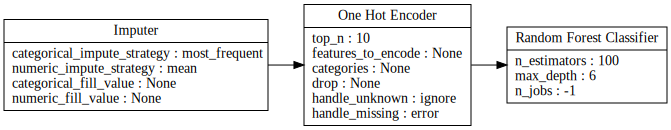

In [88]:
best_pipeline.graph()

In [89]:
best_pipeline.feature_importance

,feature,importance
0,QLANG,0.172051
1,DEM_AGE,0.128545
2,DEM_LOCATION,0.116199
3,DEM_ABOR_TYPE,0.107459
4,DEM_ABOR,0.096143
5,DEM_REGION,0.088227
6,DEM_INCOME,0.078084
7,DEM_EDU,0.043111
8,DEM_MARITAL,0.033718
9,DEM_GENDER,0.025328


In [90]:
best_pipeline.graph_feature_importance()

In [91]:
predictions = best_pipeline.predict(X_test)
predictions = predictions.to_series().to_list()

print ('Accuracy: ' + str(accuracy_score(y_test, predictions)))

Accuracy: 0.6666666666666666


In [92]:
confusion_matrix(y_test, predictions)

,0,1
0,0.984290,0.015710
1,0.953955,0.046045


In [93]:
graph_confusion_matrix(y_test, predictions)